# Курсовая работа
## по курсу Фундаментальные Концепции ИИ
**выполнил** Студент группы М8О-114СВ-24 ***Зайцев Кирилл***

***Датасет Global MMLU***

MMLU (Measuring Massive Multitask Language Understanding) - датасет задачи Question Answering. Содержит вопрос и 4 варианта ответа. Модели необходимо выбрать один из 4х вариантов ответа. Является одним из основных бенчмарков для LLM. Существует множество вариаций этого датасета, но мною был взят Global MMLU, в котором есть русский язык

In [1]:
import matplotlib.pyplot as plt

## Dataloader
DataLoader — это класс или инструмент, который используется в основном в контексте глубокого обучения и обработки данных для эффективной загрузки и управления наборами данных во время обучения модели. Он абстрагирует процесс загрузки, предварительной обработки и пакетной обработки данных, делая его более удобным и оптимизированным.

В качестве ***dataloader'а*** используется функция load_dataset из библиотеки **datasets** из экосистемы **Hugging Face**

In [1]:
from datasets import load_dataset

ds = load_dataset("CohereForAI/Global-MMLU", "ru")

## EDA

Посмотрим на тестовый датасет

In [2]:
test = ds['test']

In [3]:
test

Dataset({
    features: ['sample_id', 'subject', 'subject_category', 'question', 'option_a', 'option_b', 'option_c', 'option_d', 'answer', 'required_knowledge', 'time_sensitive', 'reference', 'culture', 'region', 'country', 'cultural_sensitivity_label', 'is_annotated'],
    num_rows: 14042
})

In [5]:
len(test)

14042

Построим круговые диаграммы для распределений категорий предметов вопросов, вариантов ответов и самих предметов

In [6]:
from collections import Counter

In [7]:
cnt = Counter(test['subject_category'])

### Категории предметов

([<matplotlib.patches.Wedge at 0x7fefcbf0d280>,
 [Text(0.8374765891698098, 0.7131850829851265, 'STEM'),
  Text(-0.0009844243618269642, 1.0999995595038554, 'Business'),
  Text(-0.5258872720158836, 0.966148320462077, 'Medical'),
  Text(-1.0987745699010252, 0.05190803925036125, 'Social Sciences'),
  Text(0.1350142915529429, -1.091682710807704, 'Humanities'),
  Text(1.0786049636781843, -0.2158965778533397, 'Other')])

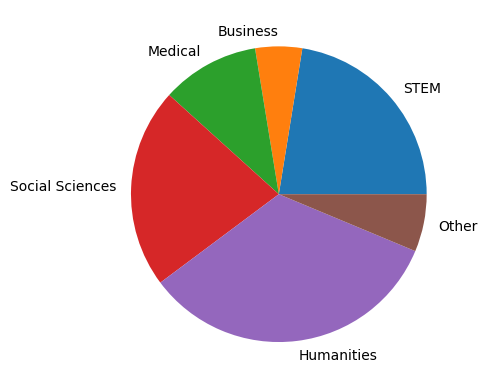

In [8]:
plt.pie(cnt.values(), labels=cnt.keys())

### Варианты ответов

In [9]:
cnt = Counter(test['answer'])

([<matplotlib.patches.Wedge at 0x7fefd95bb5b0>,
 [Text(0.7862114659183119, 0.7693318730291754, 'B'),
  Text(-0.7733673356684604, 0.7822422668975815, 'C'),
  Text(-0.7217659752429882, -0.8300926918010653, 'D'),
  Text(0.8263677080548459, -0.7260278307917549, 'A')])

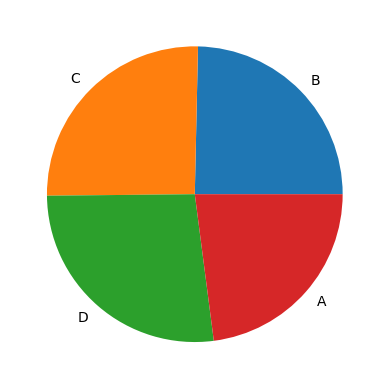

In [10]:
plt.pie(cnt.values(), labels=cnt.keys())

### Предметы

In [11]:
cnt = Counter(test['subject'])

([<matplotlib.patches.Wedge at 0x7fefd957b040>,
 [Text(1.094643152375482, 0.10842679077362545, 'abstract_algebra'),
  Text(1.0403804040450895, 0.35722348030186435, 'anatomy'),
  Text(0.8990207372821356, 0.6338467590330374, 'astronomy'),
  Text(0.715259592575835, 0.8357055194434524, 'business_ethics'),
  Text(0.3746342126257985, 1.0342384670520857, 'clinical_knowledge'),
  Text(-0.06187113705119803, 1.0982586045189868, 'college_biology'),
  Text(-0.3221050713595424, 1.051783401183183, 'college_chemistry'),
  Text(-0.52218434353042, 0.9681546939263913, 'college_computer_science'),
  Text(-0.701969427911689, 0.8468995939763676, 'college_mathematics'),
  Text(-0.9021387734203087, 0.6294010116703826, 'college_medicine'),
  Text(-1.0378867769843025, 0.36440504683818103, 'college_physics'),
  Text(-1.0895087692542655, 0.15156068658479882, 'computer_security'),
  Text(-1.0796769201961, -0.21047030193322808, 'conceptual_physics'),
  Text(-0.9451202362399225, -0.5628034639639253, 'econometrics')

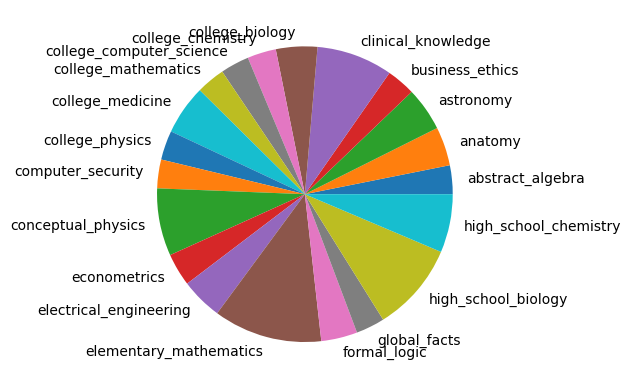

In [12]:
plt.pie(list(cnt.values())[:20], labels=list(cnt.keys())[:20])

In [13]:
len(cnt)

57

Разнообразие задач: MMLU охватывает 57 различных областей знаний, включая:

***Гуманитарные науки (история, философия, психология, социология, и т.д.)***

***Точные науки (математика, физика, химия, биология)***

***Бизнес***

***Экономика***

***Право***

***Медицина***

и другие

MMLU разработан таким образом, чтобы оценивать способность модели применять общие знания, а не только узкоспециализированные навыки.

Вопросы представлены в виде выбора одного варианта. Правильные варианты имеют равномерное распределение на множестве $\{A, B, C, D\}$

MMLU включает более 14 000 вопросов, что делает его достаточно масштабным и надежным для оценки производительности моделей.

MMLU стал одним из стандартов в сообществе исследователей для оценки возможностей LLM в понимании языка и общих знаниях. MMLU мотивирует исследования в области улучшения возможностей LLM в рассуждении, применении знаний и понимании языка.

## LLM

На датасете MMLU показывают высокие результаты достаточно большое количество моделей. Я для примера взял модель **Qwen-2.5-7B** на 7 миллиардов параметров. Запускалась модель на сервере Cloud.ru на видеокарте Nvidia A100-40gb

In [14]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-7B")
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-7B")
device = 'cuda'
model.to(device)
model.eval()

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(152064, 3584)
    (layers): ModuleList(
      (0-27): 28 x Qwen2DecoderLayer(
        (self_attn): Qwen2SdpaAttention(
          (q_proj): Linear(in_features=3584, out_features=3584, bias=True)
          (k_proj): Linear(in_features=3584, out_features=512, bias=True)
          (v_proj): Linear(in_features=3584, out_features=512, bias=True)
          (o_proj): Linear(in_features=3584, out_features=3584, bias=False)
          (rotary_emb): Qwen2RotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear(in_features=3584, out_features=18944, bias=False)
          (up_proj): Linear(in_features=3584, out_features=18944, bias=False)
          (down_proj): Linear(in_features=18944, out_features=3584, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm()
        (post_attention_layernorm): Qwen2RMSNorm()
      )
    )
    (norm): Qwen2RMSNorm()
  )
  (lm_head): Lin

## Инференс модели

In [172]:
SYS_PROMPT = '''Вы являетесь экспертом по викторинам, который знает все, и вам поручено ответить на следующий вопрос с несколькими вариантами ответов.\
Дайте свой окончательный ответ в формате "Ответ это (выбранный вариант из нескольких вариантов ответов)"'''

In [173]:
messages = [{"role": "user", "content": SYS_PROMPT}]

In [174]:
question = test[0]['question']
opt_a = test[0]['option_a']
opt_b = test[0]['option_b']
opt_c = test[0]['option_c']
opt_d = test[0]['option_d']

In [175]:
prompt = f'''Вопрос: {question} \
(A) {opt_a} \
(B) {opt_b} \
(C) {opt_c} \
(D) {opt_d}'''
messages.append({'role': 'user',
                 'content': prompt})

In [176]:
prompt

'Вопрос: Найдите степень для заданного расширения поля Q(sqrt(2), sqrt(3), sqrt(18)) над Q. (A) 0 (B) 4 (C) 2 (D) 6'

In [177]:
text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

In [178]:
model_inputs = tokenizer([text], return_tensors="pt").to(device)

In [179]:
generated_ids = model.generate(model_inputs.input_ids, max_new_tokens=10, do_sample=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


In [180]:
generated_ids = [output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)]

In [181]:
response = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0]
response

'Ответ это (B) 4'

Модель вывела **правильный** ответ!

## Метрика
Метрика для данного датасета - это Accuracy (доля верных ответов). Эта метрика позволяет оценить качество работы модели и понятна для бизнес-заказчика. Чем чаще модель выдаёт верный ответ, тем лучше

Т.к. скорить для 14к сэмплов метрику довольно долго и GPU'шку я взял с рабочего аккаунта в MLspace), то приведу результаты бенчмарка для MMLU датасета **Qwen-2.5-7B** из интернета

In [182]:
import pandas as pd

In [187]:
results = pd.DataFrame({'Overall': ['57.64%'],
                        'Math': ['73.21%'],
                        'Physics': ['58.89%'],
                        'Chemistry': ['56.27%'],
                        'Law': ['34.23%'],
                        'Engineering': ['41.59%'],
                        'Other': ['52.81%'],
                        'Economics': ['67.42%'],
                        'Psyhology': ['66.04%'],
                        'Business': ['66.89%'],
                        'Health': ['54.63%'],
                        'Biology': ['73.22%'],
                        'Pholosophy': ['49.70%'],
                        'Computer Science': ['59.51%'],
                        'History': ['49.08%']})
results

,Overall,Math,Physics,Chemistry,Law,Engineering,Other,Economics,Psyhology,Business,Health,Biology,Pholosophy,Computer Science,History
0,57.64%,73.21%,58.89%,56.27%,34.23%,41.59%,52.81%,67.42%,66.04%,66.89%,54.63%,73.22%,49.70%,59.51%,49.08%


Результат можно трактовать следующим образом: модель обучалась на большом количестве текстов, связанных с ***математикой***, поэтому там очень высокая доля верных ответов, модель также хорошо справилась с ***биологией *** хуже всего с ***правом***, т.к. в каждой стране установлены свои правовые нормы, модель сделана коллегами из Поднебесной, где свой закон. Если заказчик захочет внедрить модель в бизнес-процесс, связанный с правом, то нужно дообучать модель, например, с помощью LoRA, либо сделать RAG, но мне больше нравится вариант с дообучением.

## Выбросы

Для MMLU выбросы можно считать по-разному:
1. Слишком длинные вопросы. Чем больше контекст, тем модели сложнее ответить на поставленный вопрос. Со слишком короткими вопросами сложнее: контекст к ним может быть включён в варианты ответа, тогда это сложно назвать выбросом.
2. Вопросы, противоречащие друг другу. В датасете есть повторяющиеся вопросы, но они не противоречат друг другу, поэтому ввыбросов по этому параметру нет

Выброса типа 1 будем искать следующим образом: построим доверительный интервал, за выбросы будем считать все те вопросы, которые не попали в доверительный интервал. 

In [10]:
quantile = 0.95
lengths = [len(text) for text in test['question']]
lengths = sorted(lengths)
left = (1 - quantile) / 2
right = quantile + left
left_bound = int(left * len(lengths))
right_bound = int(right * len(lengths))
conf_interval = lengths[left_bound:right_bound]
len(conf_interval)

13339

Порядка 800 вопросов не попали в доверительный интервал. Для них нужна отдельная проверка на то, достаточно ли полный контекст содержится в вариантах ответа. Это лучше делать ручками)

## ML System Design

Датасет MMLU является хорошим бенчмарком для сравнения LLM. Он позволяет оценить качество ответов модели на вопросы с выбором варианта ответа. Датасет MMLU может быть не только бенчмарком. Для оценки качества применения LLM в бизнес-процессах формируется датасет в MMLU-like формате, но уже с вопросами из какой-то определенной предметной области, интересной бизнес-заказчику и уже на нём производится подсчёт качества. Сейчас под MMLU понимается не один конкретный датасет, а целый формат датасетов. MMLU помогает выявлять слабые места в ответах моделей, где они могут ошибаться или не обладать необходимыми знаниями.